# 1. 准备数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# 数据集概述: 一个手写数字识别数据集，包含1797个样本，每个样本是一个8x8的灰度图像(平摊为64的特征值)，表示0-9的手写数字
digits = load_digits()
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=233)

# 2. PCA降维

In [3]:
from sklearn.decomposition import PCA
# n_components:
#   - None, 保留所有特征
#   - 整数n, 保留前n个主成分
#   - 浮点数(0,1), 表示保留能解释的方差比例，如0.9表示保留能解释90%方差的特征数
pca = PCA()
pca.fit(x_train)

PCA()

前5个主成分的特征值(方差)： [181.00732742 162.24591541 141.9656775  100.23846764  68.19393144]


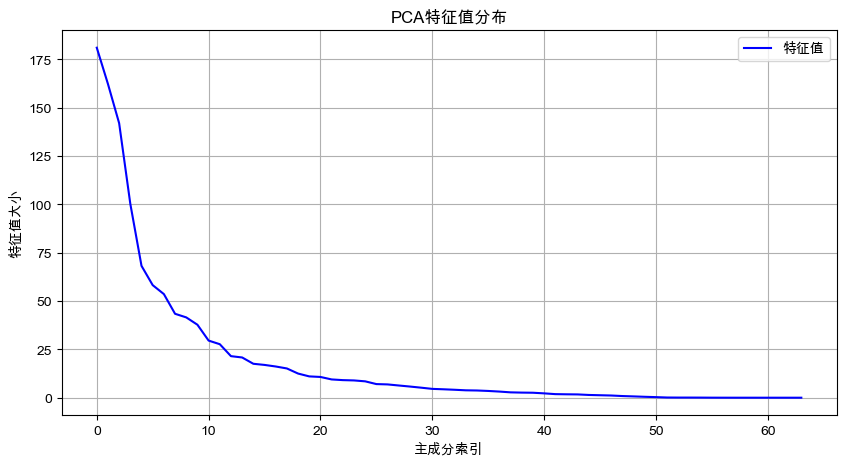

In [ ]:
# 获取PCA的特征值（explained variance），表示每个主成分解释的方差大小
explained_variance = pca.explained_variance_


print("前5个主成分的特征值(方差)：",explained_variance[:5])

# 可视化特征值
plt.figure(figsize=(10, 5))
# 设置matplotlib正常显示中文和负号
plt.rcParams['font.family'] = 'sans-serif'  # 使用系统默认字体
# 设置字体为黑体, 'STHeitiSC-Light'是系统自带字体，'SimHei'是常见中文字体，'Arial Unicode MS'是支持更广泛Unicode字符的字体
plt.rcParams['font.sans-serif'] = ['STHeitiSC-Light', 'SimHei', 'Arial Unicode MS']  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.plot(explained_variance, 'b-', label='特征值')
plt.xlabel('主成分索引')
plt.ylabel('特征值大小')
plt.title('PCA特征值分布')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
# pca.explained_variance_ratio_ # 表示每个主成分的方差占总方差的比例
# np.cumsum() 计算累加和
ratio_cum = np.cumsum(pca.explained_variance_ratio_)*100  
ratio_cum

array([ 15.0332671 ,  28.50833586,  40.29906267,  48.62420442,
        54.2879397 ,  59.12324464,  63.57365602,  67.17820476,
        70.62769551,  73.76223735,  76.21573136,  78.51389816,
        80.29850408,  82.0266312 ,  83.48396846,  84.89240984,
        86.23307241,  87.48953594,  88.5268968 ,  89.44211387,
        90.33344421,  91.11816609,  91.87348608,  92.61542052,
        93.31883678,  93.90417028,  94.47520115,  94.99993879,
        95.47944903,  95.91049238,  96.28962459,  96.65127383,
        96.99222516,  97.30985586,  97.61956305,  97.90978677,
        98.17326446,  98.40314462,  98.62229306,  98.8357971 ,
        99.02246954,  99.17625005,  99.32253941,  99.46376198,
        99.58200179,  99.68818049,  99.78268352,  99.85405995,
        99.90991171,  99.94901927,  99.97402262,  99.98221937,
        99.98777186,  99.99319208,  99.99738367,  99.99894756,
        99.9996409 ,  99.99977303,  99.99989765,  99.99995639,
       100.        , 100.        , 100.        , 100.  

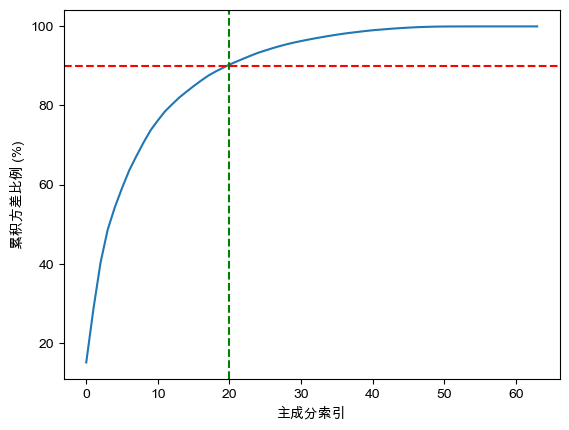

In [ ]:
plt.plot(ratio_cum)
# 帮我绘制2条线, y轴是90时,对应的x轴值
plt.axhline(y=90, color='r', linestyle='--', label='90% 方差')
plt.axvline(x=np.argmax(ratio_cum >= 90), color='g', linestyle='--', label='90% 方差对应的主成分索引')
plt.xlabel('主成分索引')
plt.ylabel('累积方差比例 (%)')
plt.show()
# 可以看到前20个主成分就能解释90%以上的方差,所以我们可以选择前20个主成分来进行降维处理

In [ ]:
pca = PCA(n_components=0.9) # 保留能解释90%方差的主成分 
# 对训练数据进行PCA拟合，计算主成分和变换矩阵
pca.fit(x_train)

# 使用训练好的PCA模型将训练数据转换到新的低维空间
# x_train_pca的维度将从64降至能解释90%方差所需的维度(约20维)
x_train_pca = pca.transform(x_train)

# 使用相同的PCA模型对测试数据进行转换
# 确保测试数据使用与训练数据相同的变换矩阵进行降维
x_test_pca = pca.transform(x_test)

In [16]:
x_train.shape, x_train_pca.shape

((1347, 64), (1347, 21))

# 3. 模型训练

In [ ]:
from sklearn.linear_model import LogisticRegression
# 创建逻辑回归分类器实例
# solver='saga': 使用SAGA优化算法，适用于大规模数据和多分类问题
# tol=0.001: 优化的容差，控制迭代停止的条件
# max_iter=500: 最大迭代次数，防止算法无限循环
# random_state=233: 设置随机种子，确保结果可复现
clf = LogisticRegression(solver='saga', tol=0.001, max_iter=500, random_state=233)

In [ ]:
%%time
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
# 原始数据训练和预测需要965ms

CPU times: user 983 ms, sys: 58.2 ms, total: 1.04 s
Wall time: 965 ms


0.9622222222222222

In [ ]:
%%time
clf.fit(x_train_pca, y_train)
clf.score(x_test_pca, y_test)
# 可以看到使用PCA降维后, 逻辑回归的分类准确率下降很少,但是训练和预测速度明显加快371ms

CPU times: user 407 ms, sys: 56.5 ms, total: 463 ms
Wall time: 371 ms


0.9555555555555556

# 4. 可视化

In [ ]:
# 把数据降为2维, 方便可视化
pca = PCA(2)
pca.fit(x_train)
x_pca_2d = pca.transform(x_test)
x_pca_2d.shape

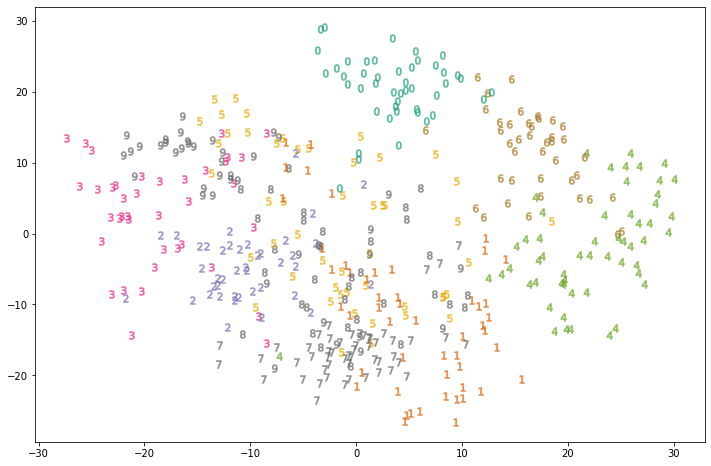

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8) # 设置图形大小为12x8

# 遍历测试集中的每个样本及其对应的标签
for i, digit in enumerate(y_test):
    # 绘制散点图:
    # - x_pca_2d[i, 0]：第i个样本降维后的第一个主成分（x坐标）
    # - x_pca_2d[i, 1]：第i个样本降维后的第二个主成分（y坐标）
    # - color：使用Dark2颜色图谱，根据数字标签选择颜色
    # - marker：使用数字本身作为标记，如"$0$"表示用0作为标记
    # - s：标记的大小为60
    # - alpha：透明度为0.5
    plt.scatter(x_pca_2d[i, 0], x_pca_2d[i, 1], 
              color = plt.cm.Dark2(digit), 
              marker = "${0}$".format(digit), 
              s = 60, 
              alpha = 0.5)

# 显示图形
plt.show()

# 这段代码的目的是将降维到2维的手写数字数据可视化
# 每个点用对应的数字标记表示，不同数字用不同颜色区分
# 可以直观地看到相同数字的样本是否聚集在一起
# 可以看到0,4,6的预测比较好, 但是1,2,3,5,7,8,9的预测效果不太好(相同数字没有聚集在一起)